In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
import keras
import numpy as np
from keras import regularizers
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout


image = np.loadtxt('bbs-train.txt')
#image = np.loadtxt('imgs-train.txt')
label = np.loadtxt('label-train.txt')
image /= np.max(image)
d = 4200
image_train = image[:d]
image_val = image[d:]
t = label[0:,1:]
t_x = np.reshape(t, (1,4546))
labels = np_utils.to_categorical(t_x, 2)
label_train = labels[:d]
label_val = labels[d:]

Using TensorFlow backend.


In [26]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 800 floats

# this is our input placeholder
input_img = Input(shape=(800,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(800, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [27]:
# an encode model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [28]:
# a decode model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [29]:
print(encoded)
print (decoded)
print(decoder_layer.input_shape)

Tensor("dense_14/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_15/Sigmoid:0", shape=(?, 800), dtype=float32)
(None, 32)


In [30]:
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [33]:
## train our autoencoder for 50 epochs:
autoencoder.fit(image_train, image_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(image_val, image_val))

Train on 4200 samples, validate on 346 samples
Epoch 1/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6917 - val_loss: 0.6899
Epoch 2/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6884 - val_loss: 0.6865
Epoch 3/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6850 - val_loss: 0.6831
Epoch 4/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6816 - val_loss: 0.6796
Epoch 5/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6781 - val_loss: 0.6760
Epoch 6/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6745 - val_loss: 0.6723
Epoch 7/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6707 - val_loss: 0.6684
Epoch 8/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6667 - val_loss: 0.6643
Epoch 9/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6624 - val_loss: 0.6598
Epoch 10/100

4200/4200 [============================

4200/4200 [==============================] - ETA: 0s - loss: 0.6289 - val_loss: 0.6225
Epoch 15/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6165 - val_loss: 0.6082
Epoch 16/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6003 - val_loss: 0.5894
Epoch 17/100

4200/4200 [==============================] - ETA: 0s - loss: 0.5790 - val_loss: 0.5646
Epoch 18/100

4200/4200 [==============================] - ETA: 0s - loss: 0.5511 - val_loss: 0.5326
Epoch 19/100

4200/4200 [==============================] - ETA: 0s - loss: 0.5157 - val_loss: 0.4925
Epoch 20/100

4200/4200 [==============================] - ETA: 0s - loss: 0.4725 - val_loss: 0.4448
Epoch 21/100

4200/4200 [==============================] - ETA: 0s - loss: 0.4226 - val_loss: 0.3913
Epoch 22/100

4200/4200 [==============================] - ETA: 0s - loss: 0.3687 - val_loss: 0.3357
Epoch 23/100

4200/4200 [==============================] - ETA: 0s - loss: 0.3148 - val_loss: 0.2821
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0772 - val_loss: 0.0625
Epoch 33/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0695 - val_loss: 0.0555
Epoch 34/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0631 - val_loss: 0.0498
Epoch 35/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0578 - val_loss: 0.0450
Epoch 36/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0534 - val_loss: 0.0410
Epoch 37/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0498 - val_loss: 0.0376
Epoch 38/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0467 - val_loss: 0.0347
Epoch 39/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0441 - val_loss: 0.0322
Epoch 40/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0419 - val_loss: 0.0301
Epoch 41/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0400 - val_loss: 0.0282
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0305 - val_loss: 0.0184
Epoch 51/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0299 - val_loss: 0.0178
Epoch 52/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0294 - val_loss: 0.0172
Epoch 53/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0289 - val_loss: 0.0167
Epoch 54/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0285 - val_loss: 0.0162
Epoch 55/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0280 - val_loss: 0.0157
Epoch 56/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0277 - val_loss: 0.0153
Epoch 57/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0273 - val_loss: 0.0149
Epoch 58/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0270 - val_loss: 0.0145
Epoch 59/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0267 - val_loss: 0.0142
Epoc

Epoch 68/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0249 - val_loss: 0.0120
Epoch 69/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0247 - val_loss: 0.0118
Epoch 70/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0246 - val_loss: 0.0116
Epoch 71/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0245 - val_loss: 0.0115
Epoch 72/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0244 - val_loss: 0.0113
Epoch 73/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0242 - val_loss: 0.0112
Epoch 74/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0241 - val_loss: 0.0110
Epoch 75/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0240 - val_loss: 0.0109
Epoch 76/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0239 - val_loss: 0.0108
Epoch 77/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0238 - val_los

4200/4200 [==============================] - ETA: 0s - loss: 0.0233 - val_loss: 0.0099
Epoch 86/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0232 - val_loss: 0.0098
Epoch 87/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0231 - val_loss: 0.0097
Epoch 88/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0231 - val_loss: 0.0097
Epoch 89/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0230 - val_loss: 0.0096
Epoch 90/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0230 - val_loss: 0.0095
Epoch 91/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0229 - val_loss: 0.0095
Epoch 92/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0229 - val_loss: 0.0094
Epoch 93/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0229 - val_loss: 0.0093
Epoch 94/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0228 - val_loss: 0.0093
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0226 - val_loss: 0.0090


In [34]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(image_val)
decoded_imgs = decoder.predict(encoded_imgs)


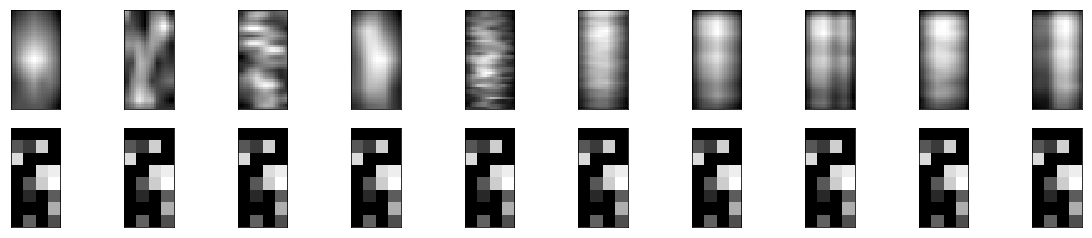

In [46]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many picture we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_val[i].reshape(40, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [37]:
## Deep autoencoder

input_img = Input(shape=(800,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(800, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(image_train, image_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(image_val, image_val))


Train on 4200 samples, validate on 346 samples
Epoch 1/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6916 - val_loss: 0.6897
Epoch 2/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6880 - val_loss: 0.6859
Epoch 3/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6841 - val_loss: 0.6817
Epoch 4/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6794 - val_loss: 0.6761
Epoch 5/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6725 - val_loss: 0.6664
Epoch 6/100

4200/4200 [==============================] - ETA: 0s - loss: 0.6565 - val_loss: 0.6357
Epoch 7/100

4200/4200 [==============================] - ETA: 0s - loss: 0.5602 - val_loss: 0.3302
Epoch 8/100

4200/4200 [==============================] - ETA: 0s - loss: 0.1197 - val_loss: 0.0175
Epoch 9/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0267 - val_loss: 0.0092
Epoch 10/100

4200/4200 [============================

4200/4200 [==============================] - ETA: 0s - loss: 0.0221 - val_loss: 0.0074
Epoch 12/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0217 - val_loss: 0.0073
Epoch 13/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0214 - val_loss: 0.0071
Epoch 14/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0212 - val_loss: 0.0070
Epoch 15/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0211 - val_loss: 0.0069
Epoch 16/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0210 - val_loss: 0.0068
Epoch 17/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0209 - val_loss: 0.0068
Epoch 18/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0208 - val_loss: 0.0068
Epoch 19/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0207 - val_loss: 0.0067
Epoch 20/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0206 - val_loss: 0.0067
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0204 - val_loss: 0.0066
Epoch 25/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0204 - val_loss: 0.0065
Epoch 26/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0204 - val_loss: 0.0065
Epoch 27/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0203 - val_loss: 0.0065
Epoch 28/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0203 - val_loss: 0.0065
Epoch 29/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0203 - val_loss: 0.0065
Epoch 30/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0203 - val_loss: 0.0065
Epoch 31/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0202 - val_loss: 0.0064
Epoch 32/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0202 - val_loss: 0.0064
Epoch 33/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0202 - val_loss: 0.0064
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0201 - val_loss: 0.0064
Epoch 39/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0201 - val_loss: 0.0064
Epoch 40/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0201 - val_loss: 0.0064
Epoch 41/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0201 - val_loss: 0.0064
Epoch 42/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoch 43/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoch 44/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoch 45/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoch 46/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoch 47/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0200 - val_loss: 0.0063
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0063
Epoch 52/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0063
Epoch 53/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0063
Epoch 54/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 55/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 56/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 57/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 58/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 59/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0199 - val_loss: 0.0062
Epoch 60/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 65/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 66/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 67/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 68/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 69/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 70/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 71/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 72/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoch 73/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0198 - val_loss: 0.0062
Epoc

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0062
Epoch 77/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 78/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 79/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 80/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 81/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 82/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 83/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 84/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 85/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoc

Epoch 89/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 90/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 91/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 92/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 93/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 94/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 95/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 96/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 97/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_loss: 0.0061
Epoch 98/100

4200/4200 [==============================] - ETA: 0s - loss: 0.0197 - val_los

In [38]:
encoded_imgs = encoder.predict(image_train)
encoded_val = encoder.predict(image_val)

print(Dense(encoded))
print(encoder)
print(autoencoder.layers[1])

In [7]:
import tensorflow as tf
import numpy as np
import random as rd
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
import time
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.optimizers import SGD

In [9]:
def DefineModel():
    # hidden layers
    # one lay
    first_layer_width = 16
    second_layer_width = 4
    third_layer_width = 0
    
    # activation function
    activation_func = 'relu' 
    
    # loss function either categorical_crossentropy or mean_squared_error
    loss_function = 'categorical_crossentropy'
    
    
    learning_rate = 0.1
    
    # initialize the model
    model= Sequential()
    
    ## First hidden layer with 'first_layer_width' neurons. 
    ## Also need to specify input dimension.
    ## 'Dense' means fully-connected.
    model.add(Dense(first_layer_width, input_dim=32))
    model.add(Activation(activation_func))
    model.add(Dropout(0.1))
    
    if second_layer_width > 0:
        model.add(Dense(second_layer_width))
        model.add(Activation(activation_func))
        model.add(Dropout(0.1))
        
    if third_layer_width > 0:
        model.add(Dense(third_layer_width))
        model.add(Activation(activation_func))
        model.add(Dropout(0.1))
        
    ## Last layer has the same dimension as the number of classes
    model.add(Dense(2))
    ## For classification, the activation is softmax
    model.add(Activation('softmax'))
    ## Define optimizer. Here, we select SGD.
    opt = SGD(lr=learning_rate, clipnorm=5.)
    model.compile(loss = loss_function, optimizer=opt, metrics=["accuracy"])
    
    return model

In [10]:
def TrainModel(data=None, epochs=20):
    batch=1024
    start_time = time.time()
    model = DefineModel()
    x_train, x_val, y_train, y_val = data
    print('Start training.')

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
            validation_data=(x_val, y_val))
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [11]:
trained_model, training_history = TrainModel(data=[encoded_imgs, encoded_val, label_train, label_val])

Start training.
Train on 4200 samples, validate on 346 samples
Epoch 1/20

4200/4200 [==============================] - ETA: 0s - loss: 0.7505 - acc: 0.5562 - val_loss: 0.5478 - val_acc: 0.8555
Epoch 2/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6415 - acc: 0.6633 - val_loss: 0.5302 - val_acc: 0.8555
Epoch 3/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6367 - acc: 0.6633 - val_loss: 0.4962 - val_acc: 0.8555
Epoch 4/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6406 - acc: 0.6633 - val_loss: 0.5168 - val_acc: 0.8555
Epoch 5/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6369 - acc: 0.6633 - val_loss: 0.5199 - val_acc: 0.8555
Epoch 6/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6420 - acc: 0.6633 - val_loss: 0.5015 - val_acc: 0.8555
Epoch 7/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6401 - acc: 0.6633 - val_loss: 0.5109 - val_acc: 0.8555
Epoch 8/20

4200/420

In [143]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(128,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(image_val)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: Error when checking : expected input_51 to have shape (None, 128) but got array with shape (346, 32)

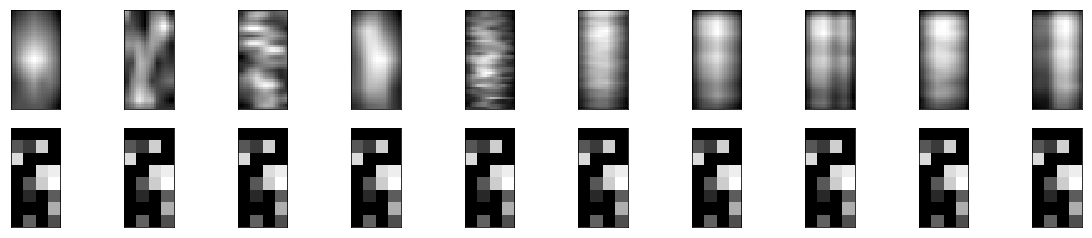

In [48]:
n = 10  # how many picture we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_val[i].reshape(40, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()